# Sentiment Analysis
Using: https://towardsdatascience.com/how-to-analyze-emotions-and-words-of-the-lyrics-from-your-favorite-music-artist-bbca10411283

In [ ]:
!pip install wordcloud

In [ ]:
#download everything
!pip install --upgrade pip

In [ ]:
!pip install helpers

In [1]:
%run helpers.py

In [2]:
#libraries used to extract, clean and manipulate the data
from helpers import *
import pandas as pd
import os
#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer
#To create the sentiment analysis model, tokenization and lemmatization
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/amos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# export folder path
export_path = os.path.join("..", "datasets", "SentimentAnalysis")
if not os.path.exists(export_path):
  os.makedirs(export_path)

In [4]:
#load data
#import data
df2017 = pd.read_csv ('../datasets/CleanData/2017_cleaned_songs_lyrics.csv')

df2018 = pd.read_csv ('../datasets/CleanData/2018_cleaned_songs_lyrics.csv')

df2019 = pd.read_csv ('../datasets/CleanData/2019_cleaned_songs_lyrics.csv')

df2020 = pd.read_csv ('../datasets/CleanData/2020_cleaned_songs_lyrics.csv')

df2021 = pd.read_csv ('../datasets/CleanData/2021_cleaned_songs_lyrics.csv')

In [5]:
df2017

,Unnamed: 0,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics
0,0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...
1,1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...
2,2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...
3,3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...
4,4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...
...,...,...,...,...,...,...,...,...
809,809,Adventure of a Lifetime,Coldplay,2638669,69uxyAqqPIsUyTO8txoP2M,turn magic umi say everything want dream away ...,turn magic umi say everyth want dream away leg...,turn magic umi say everything want dream away ...
810,810,Can't Hold Us (feat. Ray Dalton),"Macklemore & Ryan Lewis, Macklemore, Ryan Lewi...",2632407,3bidbhpOYeV4knp8AIu8Xn,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...
811,811,Stay (feat. Maty Noyes),"Kygo, Maty Noyes",2598170,2FiSTH0GYpIioUgjfzMIja,thought could leave cause felt heart numbing h...,thought could leav caus felt heart numb hit de...,thought could leave cause felt heart numbing h...
812,812,Famous,Kanye West,2580512,19a3JfW8BQwqHWUMbcqSx8,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...


### Key things to note for helpers.py
- cleaning lyrics: changed all words to lowercase, removed extra characters
- lyrics to words function: removed stopwords, lemmatized, removed punctuation

In [6]:
df2017['Year'] = 2017
df2017 = df2017.iloc[:,1:]
df2018['Year'] = 2018
df2018 = df2018.iloc[:,1:]
df2019['Year'] = 2019
df2019 = df2019.iloc[:,1:]
df2020['Year'] = 2020
df2020 = df2020.iloc[:,1:]
df2021['Year'] = 2021
df2021 = df2021.iloc[:,1:]

In [7]:
df2019.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,bad guy,Billie Eilish,1072582834,2Fxmhks0bxGSBdJ92vM42m,white shirt red bloody nose sleepin tippy toes...,white shirt red bloodi nose sleepin tippi toe ...,white shirt red bloody nose sleepin tippy toe ...,2019
1,7 rings,Ariana Grande,801570133,6ocbgoVGwYJhOv1GgI9NsF,yeah breakfast tiffany bottles bubbles girls t...,yeah breakfast tiffani bottl bubbl girl tattoo...,yeah breakfast tiffany bottle bubble girl tatt...,2019
2,Dance Monkey,Tones And I,795536724,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2019
3,Señorita,"Shawn Mendes, Camila Cabello",780956851,6v3KW9xbzN5yKLt9YKDYA2,love call senorita wish could pretend need ya ...,love call senorita wish could pretend need ya ...,love call senorita wish could pretend need ya ...,2019
4,Shallow,"Lady Gaga, Bradley Cooper",723325027,2VxeLyX666F8uXCJ0dZF8B,tell somethin girl happy modern world need som...,tell somethin girl happi modern world need som...,tell somethin girl happy modern world need som...,2019


In [8]:
df = df2017
df

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017
1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017
2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017
3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017
4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017
...,...,...,...,...,...,...,...,...
809,Adventure of a Lifetime,Coldplay,2638669,69uxyAqqPIsUyTO8txoP2M,turn magic umi say everything want dream away ...,turn magic umi say everyth want dream away leg...,turn magic umi say everything want dream away ...,2017
810,Can't Hold Us (feat. Ray Dalton),"Macklemore & Ryan Lewis, Macklemore, Ryan Lewi...",2632407,3bidbhpOYeV4knp8AIu8Xn,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,2017
811,Stay (feat. Maty Noyes),"Kygo, Maty Noyes",2598170,2FiSTH0GYpIioUgjfzMIja,thought could leave cause felt heart numbing h...,thought could leav caus felt heart numb hit de...,thought could leave cause felt heart numbing h...,2017
812,Famous,Kanye West,2580512,19a3JfW8BQwqHWUMbcqSx8,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,2017


In [9]:
df1 = df2018

In [10]:
df2 = df2019

In [11]:
df3 = df2020

In [12]:
df4 = df2021

In [13]:
df.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017
1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017
2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017
3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017
4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017


In [14]:
df.tail()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
809,Adventure of a Lifetime,Coldplay,2638669,69uxyAqqPIsUyTO8txoP2M,turn magic umi say everything want dream away ...,turn magic umi say everyth want dream away leg...,turn magic umi say everything want dream away ...,2017
810,Can't Hold Us (feat. Ray Dalton),"Macklemore & Ryan Lewis, Macklemore, Ryan Lewi...",2632407,3bidbhpOYeV4knp8AIu8Xn,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,2017
811,Stay (feat. Maty Noyes),"Kygo, Maty Noyes",2598170,2FiSTH0GYpIioUgjfzMIja,thought could leave cause felt heart numbing h...,thought could leav caus felt heart numb hit de...,thought could leave cause felt heart numbing h...,2017
812,Famous,Kanye West,2580512,19a3JfW8BQwqHWUMbcqSx8,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,2017
813,Sugar,Maroon 5,2541963,494OU6M7NOf4ICYb4zWCf5,hurting baby broken need loving loving need wi...,hurt babi broken need love love need without s...,hurting baby broken need loving loving need wi...,2017


In [15]:
df.describe()

,streams,Year
count,8.140000e+02,814.0
mean,7.796346e+07,2017.0
std,1.306337e+08,0.0
min,2.541963e+06,2017.0
25%,5.628960e+06,2017.0
50%,2.588310e+07,2017.0
75%,8.563262e+07,2017.0
max,1.514649e+09,2017.0


In [16]:
df.shape

(814, 8)

# Creating unique words and examining them (Year 2017)

In [17]:
df['Year'] = 2017
df

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017
1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017
2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017
3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017
4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017
...,...,...,...,...,...,...,...,...
809,Adventure of a Lifetime,Coldplay,2638669,69uxyAqqPIsUyTO8txoP2M,turn magic umi say everything want dream away ...,turn magic umi say everyth want dream away leg...,turn magic umi say everything want dream away ...,2017
810,Can't Hold Us (feat. Ray Dalton),"Macklemore & Ryan Lewis, Macklemore, Ryan Lewi...",2632407,3bidbhpOYeV4knp8AIu8Xn,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,hey hey hey good see come dude let go yeah let...,2017
811,Stay (feat. Maty Noyes),"Kygo, Maty Noyes",2598170,2FiSTH0GYpIioUgjfzMIja,thought could leave cause felt heart numbing h...,thought could leav caus felt heart numb hit de...,thought could leave cause felt heart numbing h...,2017
812,Famous,Kanye West,2580512,19a3JfW8BQwqHWUMbcqSx8,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,man understand might kinda hard love girl like...,2017


In [18]:
def unique(list1):
   # intilize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

In [19]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []

#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['lemmatized_lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
    
#create the new column with the information of words lists
df['words'] = words
df.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,words
0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017,"[club, best, place, find, lover, bar, go, frie..."
1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017,"[reading, book, old, legend, myth, achilles, g..."
2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017,"[nobody, pray, day, way, yeah, ayy, remember, ..."
3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017,"[best, music, another, one, dj, khaled, yeah, ..."
4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017,"[dream, sipping, whiskey, neat, highest, floor..."


In [20]:
#Create a new dataframe of all the  words used in lyrics and its decades
#list used to store the information
set_words = []
set_year = []

#Iterate trought each word and decade and stores them into the new lists
for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_year.append(df['Year'].iloc[i])
        
#create the new data frame  with the information of words and decade lists
words_df = pd.DataFrame({'words':set_words,'Year':set_year})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer()

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['Year'] = words_df['Year']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('Year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv(os.path.join(export_path, 'words2017.csv'), index=False)
vect_words

,words,2017
0,aaa,1
1,aagh,1
2,aaliyah,2
3,aaron,1
4,ab,1
...,...,...
9948,키스해줘,1
9949,터질,1
9950,테니까,1
9951,하나만,1


# Creating unique words and examining them (Year 2018)

In [21]:
df1

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,God's Plan,Drake,784711973,2XW4DbS6NddZxRPm5rMCeY,wishin wishin wishin wishin wishin yeah movin ...,wishin wishin wishin wishin wishin yeah movin ...,wishin wishin wishin wishin wishin yeah movin ...,2018
1,SAD!,XXXTENTACION,754067334,3ee8Jmje8o58CHK66QrVC2,yeah someone afraid let go uh decide ever gonn...,yeah someon afraid let go uh decid ever gonna ...,yeah someone afraid let go uh decide ever gonn...,2018
2,Better Now,Post Malone,699355089,7dt6x5M1jzdTEt8oCbisTK,prolly think better better say cause around ar...,prolli think better better say caus around aro...,prolly think better better say cause around ar...,2018
3,I Like It,"Cardi B, Bad Bunny, J Balvin",682954979,58q2HKrzhC3ozto2nDdN4z,yeah baby like like gotta believe tell said li...,yeah babi like like gotta believ tell said lik...,yeah baby like like gotta believe tell said li...,2018
4,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",667709525,7ef4DlsgrMEH11cDZd32M6,one kiss takes fallin love possibilities look ...,one kiss take fallin love possibl look like ne...,one kiss take fallin love possibility look lik...,2018
...,...,...,...,...,...,...,...,...
1045,Hey DJ,"CNCO, Yandel",3603304,209gZgcfLq2aUuu51vOWBl,bless mr dj make music play make gyal swing ev...,bless mr dj make music play make gyal swing ev...,bless mr dj make music play make gyal swing ev...,2018
1046,Rubbin off the Paint,YBN Nahmir,3528089,0taOCiup4HNG9LmbduVlJj,thought said let offer rebuttal ayy ayy gang g...,thought said let offer rebutt ayi ayi gang gan...,thought said let offer rebuttal ayy ayy gang g...,2018
1047,Let Me Love You,"DJ Snake, Justin Bieber",3504950,4pdPtRcBmOSQDlJ3Fk945m,used believe burnin edge somethin beautiful so...,use believ burnin edg somethin beauti somethin...,used believe burnin edge somethin beautiful so...,2018
1048,Drowning (feat. Kodak Black),"A Boogie Wit da Hoodie, Kodak Black",3483644,1f5cbQtDrykjarZVrShaDI,drownin drownin drownin drownin wrist icy wond...,drownin drownin drownin drownin wrist ici wond...,drownin drownin drownin drownin wrist icy wond...,2018


In [22]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []

#iterate trought each lyric and split unique words appending the result into the words list
df1 = df1.reset_index(drop=True)
for word in df1['lemmatized_lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
    
#create the new column with the information of words lists
df1['words'] = words
df1.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,words
0,God's Plan,Drake,784711973,2XW4DbS6NddZxRPm5rMCeY,wishin wishin wishin wishin wishin yeah movin ...,wishin wishin wishin wishin wishin yeah movin ...,wishin wishin wishin wishin wishin yeah movin ...,2018,"[wishin, yeah, movin, calm, start, trouble, tr..."
1,SAD!,XXXTENTACION,754067334,3ee8Jmje8o58CHK66QrVC2,yeah someone afraid let go uh decide ever gonn...,yeah someon afraid let go uh decid ever gonna ...,yeah someone afraid let go uh decide ever gonn...,2018,"[yeah, someone, afraid, let, go, uh, decide, e..."
2,Better Now,Post Malone,699355089,7dt6x5M1jzdTEt8oCbisTK,prolly think better better say cause around ar...,prolli think better better say caus around aro...,prolly think better better say cause around ar...,2018,"[prolly, think, better, say, cause, around, kn..."
3,I Like It,"Cardi B, Bad Bunny, J Balvin",682954979,58q2HKrzhC3ozto2nDdN4z,yeah baby like like gotta believe tell said li...,yeah babi like like gotta believ tell said lik...,yeah baby like like gotta believe tell said li...,2018,"[yeah, baby, like, gotta, believe, tell, said,..."
4,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",667709525,7ef4DlsgrMEH11cDZd32M6,one kiss takes fallin love possibilities look ...,one kiss take fallin love possibl look like ne...,one kiss take fallin love possibility look lik...,2018,"[one, kiss, take, fallin, love, possibility, l..."


In [23]:
#Create a new dataframe of all the  words used in lyrics and its decades
#list used to store the information
set_words = []
set_year = []

#Iterate trought each word and decade and stores them into the new lists
for i in df1.index:
    for word in df1['words'].iloc[i]:
        set_words.append(word)
        set_year.append(df1['Year'].iloc[i])
#create the new data frame  with the information of words and decade lists
words_df1 = pd.DataFrame({'words':set_words,'Year':set_year})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer()

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df1['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['Year'] = words_df1['Year']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('Year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv(os.path.join(export_path, 'words2018.csv'), index=False)
vect_words

,words,2018
0,aaa,1
1,aagh,1
2,aah,2
3,aames,2
4,aang,1
...,...,...
12414,행복해,1
12415,헷갈림,1
12416,홀로인,1
12417,확신해,1


# Creating unique words and examining them (Year 2019)

In [24]:
#Stores unique words of each lyrics song into a new column called words
#list used to store the words
words = []

#iterate trought each lyric and split unique words appending the result into the words list
df2 = df2.reset_index(drop=True)
for word in df2['lemmatized_lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
    
#create the new column with the information of words lists
df2['words'] = words
df2.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,words
0,bad guy,Billie Eilish,1072582834,2Fxmhks0bxGSBdJ92vM42m,white shirt red bloody nose sleepin tippy toes...,white shirt red bloodi nose sleepin tippi toe ...,white shirt red bloody nose sleepin tippy toe ...,2019,"[white, shirt, red, bloody, nose, sleepin, tip..."
1,7 rings,Ariana Grande,801570133,6ocbgoVGwYJhOv1GgI9NsF,yeah breakfast tiffany bottles bubbles girls t...,yeah breakfast tiffani bottl bubbl girl tattoo...,yeah breakfast tiffany bottle bubble girl tatt...,2019,"[yeah, breakfast, tiffany, bottle, bubble, gir..."
2,Dance Monkey,Tones And I,795536724,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2019,"[say, oh, god, see, way, shine, take, hand, de..."
3,Señorita,"Shawn Mendes, Camila Cabello",780956851,6v3KW9xbzN5yKLt9YKDYA2,love call senorita wish could pretend need ya ...,love call senorita wish could pretend need ya ...,love call senorita wish could pretend need ya ...,2019,"[love, call, senorita, wish, could, pretend, n..."
4,Shallow,"Lady Gaga, Bradley Cooper",723325027,2VxeLyX666F8uXCJ0dZF8B,tell somethin girl happy modern world need som...,tell somethin girl happi modern world need som...,tell somethin girl happy modern world need som...,2019,"[tell, somethin, girl, happy, modern, world, n..."


In [25]:
#Create a new dataframe of all the  words used in lyrics and its decades
#list used to store the information
set_words = []
set_year = []

#Iterate trought each word and decade and stores them into the new lists
for i in df2.index:
    for word in df2['words'].iloc[i]:
        set_words.append(word)
        set_year.append(df2['Year'].iloc[i])
        
#create the new data frame  with the information of words and decade lists
words_df2 = pd.DataFrame({'words':set_words,'Year':set_year})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer()

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df2['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['Year'] = words_df2['Year']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('Year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv(os.path.join(export_path, 'words2019.csv'), index=False)
vect_words

,words,2019
0,aa,1
1,aaah,1
2,aah,3
3,aaliya,1
4,aaliyah,1
...,...,...
9808,홀린,1
9809,환하게,1
9810,후회,1
9811,훨씬,1


# Creating unique words and examining them (Year 2020)

In [26]:
def unique(list1):
   # intilize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

In [27]:
#Stores unique words of each lyrics song into a new column called words

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df3 = df3.reset_index(drop=True)
for word in df3['lemmatized_lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
    
#create the new column with the information of words lists
df3['words'] = words
df3.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,words
0,Blinding Lights,The Weeknd,1236759169,0VjIjW4GlUZAMYd2vXMi3b,yeah tryna call long enough maybe show love ma...,yeah tryna call long enough mayb show love may...,yeah tryna call long enough maybe show love ma...,2020,"[yeah, tryna, call, long, enough, maybe, show,..."
1,Dance Monkey,Tones And I,1194341955,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2020,"[say, oh, god, see, way, shine, take, hand, de..."
2,The Box,Roddy Ricch,1045663988,0nbXyq5TXYPCO7pr3N8S4I,pullin coupe lot told em fuck fuck swat bustin...,pullin coup lot told em fuck fuck swat bustin ...,pullin coupe lot told em fuck fuck swat bustin...,2020,"[pullin, coupe, lot, told, em, fuck, swat, bus..."
3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",917851312,7ytR5pFWmSjzHJIeQkgog4,woo woo pull like pull baby pull oh oh oh pull...,woo woo pull like pull babi pull oh oh oh pull...,woo woo pull like pull baby pull oh oh oh pull...,2020,"[woo, pull, like, baby, oh, let, go, brand, ne..."
4,Watermelon Sugar,Harry Styles,852045823,6UelLqGlWMcVH1E5c4H7lY,tastes like strawberries summer evenin sounds ...,tast like strawberri summer evenin sound like ...,taste like strawberry summer evenin sound like...,2020,"[taste, like, strawberry, summer, evenin, soun..."


In [28]:
#Create a new dataframe of all the  words used in lyrics and its decades

#list used to store the information
set_words = []
set_year = []
#Iterate trought each word and decade and stores them into the new lists
for i in df3.index:
    for word in df3['words'].iloc[i]:
        set_words.append(word)
        set_year.append(df3['Year'].iloc[i])
#create the new data frame  with the information of words and decade lists
words_df3 = pd.DataFrame({'words':set_words,'Year':set_year})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer()

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df3['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['Year'] = words_df3['Year']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('Year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv(os.path.join(export_path, 'words2020.csv'), index=False)
vect_words

,words,2020
0,aa,1
1,aaa,1
2,aah,1
3,aaliyah,1
4,abandon,1
...,...,...
11261,흘러,1
11262,희망이란,1
11263,힘껏,2
11264,힘든,1


# Creating unique words and examining them (Year 2021)

In [29]:
def unique(list1):
   # intilize a null list
     unique_list = []
   # traverse for all elements
     for x in list1:
         # check if exists in unique_list or not
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

In [30]:
#Stores unique words of each lyrics song into a new column called words

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df4 = df4.reset_index(drop=True)
for word in df4['lemmatized_lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))
    
#create the new column with the information of words lists
df4['words'] = words
df4.head()

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,words
0,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",1153551513,5PjdY0CKGZdEuoNab3yDmX,thing told never would told change even knew n...,thing told never would told chang even knew ne...,thing told never would told change even knew n...,2021,"[thing, told, never, would, change, even, knew..."
1,good 4 u,Olivia Rodrigo,1094634977,4ZtFanR9U6ndgddUvNcjcG,ah well good guess moved really easily found n...,ah well good guess move realli easili found ne...,ah well good guess moved really easily found n...,2021,"[ah, well, good, guess, moved, really, easily,..."
2,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",987178142,5nujrmhLynf4yMoMtj8AQF,wanna run away know galaxy take ride premoniti...,wanna run away know galaxi take ride premonit ...,wanna run away know galaxy take ride premoniti...,2021,"[wanna, run, away, know, galaxy, take, ride, p..."
3,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",957976263,4iJyoBOLtHqaGxP12qzhQI,got peaches georgia oh yeah shit get weed cali...,got peach georgia oh yeah shit get weed califo...,got peach georgia oh yeah shit get weed califo...,2021,"[got, peach, georgia, oh, yeah, shit, get, wee..."
4,Heat Waves,Glass Animals,933570911,02MWAaffLxlfxAUY7c5dvx,last night think stop baby walk want baby thin...,last night think stop babi walk want babi thin...,last night think stop baby walk want baby thin...,2021,"[last, night, think, stop, baby, walk, want, k..."


In [31]:
#for you to examine the dataset separately
# df.to_csv('SentAna.csv')

In [32]:
#Create a new dataframe of all the  words used in lyrics and its decades
#list used to store the information
set_words = []
set_year = []

#Iterate trought each word and decade and stores them into the new lists
for i in df4.index:
    for word in df4['words'].iloc[i]:
        set_words.append(word)
        set_year.append(df4['Year'].iloc[i])
#create the new data frame  with the information of words and decade lists
words_df4 = pd.DataFrame({'words':set_words,'Year':set_year})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer()
#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df4['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['Year'] = words_df4['Year']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('Year').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv(os.path.join(export_path, 'words2021.csv'), index=False)
vect_words

,words,2021
0,aa,1
1,aaa,1
2,aah,3
3,aaliyah,5
4,aau,1
...,...,...
10426,햇빛,1
10427,했어,1
10428,했지,1
10429,혹시,1


# Import the unique words dataframe back

In [33]:
#load data
#import data
df_unique_2017 = pd.read_csv(os.path.join(export_path, 'words2017.csv'))
df_unique_2017.rename(columns={"2017":"Count"},inplace=True)
# df2017.head()

df_unique_2018 = pd.read_csv(os.path.join(export_path, 'words2018.csv'))
df_unique_2018.rename(columns={"2018":"Count"},inplace=True)
# df2018.head()

df_unique_2019 =  pd.read_csv(os.path.join(export_path, 'words2019.csv'))
df_unique_2019.rename(columns={"2019":"Count"},inplace=True)
# df2019.head()

df_unique_2020 = pd.read_csv(os.path.join(export_path, 'words2020.csv'))
df_unique_2020.rename(columns={"2020":"Count"},inplace=True)
# df2020.head()

df_unique_2021 = pd.read_csv(os.path.join(export_path, 'words2021.csv'))
df_unique_2021.rename(columns={"2021":"Count"},inplace=True)
# df2021.head()

In [34]:
df_unique_2018

,words,Count
0,aaa,1
1,aagh,1
2,aah,2
3,aames,2
4,aang,1
...,...,...
12414,행복해,1
12415,헷갈림,1
12416,홀로인,1
12417,확신해,1


In [35]:
# dfAll =pd.Dataframe()
dfAll=pd.concat([df_unique_2017, df_unique_2018,df_unique_2019,df_unique_2020,df_unique_2021])
dfAll.dropna(inplace=True)
dfAll

,words,Count
0,aaa,1
1,aagh,1
2,aaliyah,2
3,aaron,1
4,ab,1
...,...,...
10426,햇빛,1
10427,했어,1
10428,했지,1
10429,혹시,1


In [36]:
# dfbefcovid =df_unique_2017
dfbefcovid=pd.concat([df_unique_2017, df_unique_2018,df_unique_2019])
dfbefcovid

,words,Count
0,aaa,1
1,aagh,1
2,aaliyah,2
3,aaron,1
4,ab,1
...,...,...
9808,홀린,1
9809,환하게,1
9810,후회,1
9811,훨씬,1


In [37]:
dfcovid=pd.concat([df_unique_2020,df_unique_2021])
dfcovid

,words,Count
0,aa,1
1,aaa,1
2,aah,1
3,aaliyah,1
4,abandon,1
...,...,...
10426,햇빛,1
10427,했어,1
10428,했지,1
10429,혹시,1


# Word Cloud

In [38]:
dfAll

,words,Count
0,aaa,1
1,aagh,1
2,aaliyah,2
3,aaron,1
4,ab,1
...,...,...
10426,햇빛,1
10427,했어,1
10428,했지,1
10429,혹시,1


In [39]:
dfAll.isnull().values.any()
dfAll['Count'].astype(int)
dfAll["Count"]= dfAll["Count"].fillna(0).astype(int)

<Figure size 576x396 with 0 Axes>

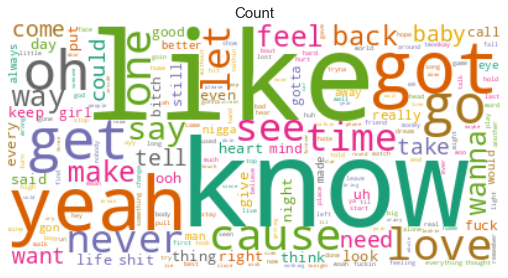

In [40]:
def plot_wordcloud(dfAll,row,col):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
     
    for index, value in enumerate(dfAll.columns[1:]):
        top_dict = dict(zip(dfAll['words'].tolist(),dfAll[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
#Plot the word cloud
plot_wordcloud(dfAll,2,2)

<Figure size 576x396 with 0 Axes>

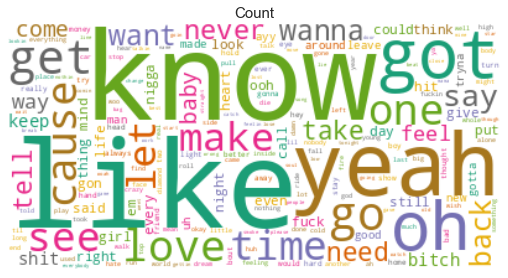

In [41]:
# plot bef covid
def plot_wordcloud(dfbefcovid,row,col):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
     
    for index, value in enumerate(dfbefcovid.columns[1:]):
        top_dict = dict(zip(dfbefcovid['words'].tolist(),dfbefcovid[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
#Plot the word cloud
plot_wordcloud(dfbefcovid,2,2)

<Figure size 576x396 with 0 Axes>

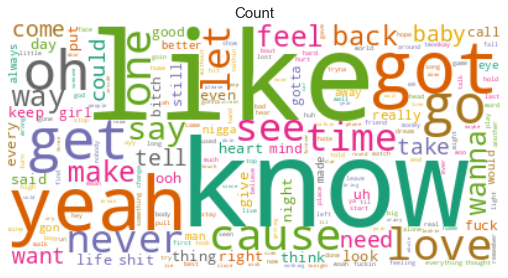

In [42]:
# plot covid
def plot_wordcloud(dfcovid,row,col):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
     
    for index, value in enumerate(dfcovid.columns[1:]):
        top_dict = dict(zip(dfcovid['words'].tolist(),dfcovid[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
#Plot the word cloud
plot_wordcloud(dfcovid,2,2)

# Sentiment

In [43]:
df=pd.concat([df2017,df2018,df2019,df2020,df2021])
df

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017
1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017
2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017
3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017
4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017
...,...,...,...,...,...,...,...,...
827,Sunday Best,Surfaces,4858392,1Cv1YLb4q0RzL6pybtaMLo,good feeling good ayy feeling good like went t...,good feel good ayi feel good like went took wa...,good feeling good ayy feeling good like went t...,2021
828,Happier,"Marshmello, Bastille",4655272,2dpaYNEQHiRxtZbfNsse99,lately thinking want happier want happier morn...,late think want happier want happier morn come...,lately thinking want happier want happier morn...,2021
829,Tequila Shots,Kid Cudi,4540781,30KctD1WsHKTIYczXjip5a,duh duh duh duh duh duh falls back deeper stat...,duh duh duh duh duh duh fall back deeper state...,duh duh duh duh duh duh fall back deeper state...,2021
830,Lose Control,"MEDUZA, Becky Hill, Goodboys",4516053,7CHi4DtfK4heMlQaudCuHK,feel like drowning like running air ah ah ah f...,feel like drown like run air ah ah ah feel lik...,feel like drowning like running air ah ah ah f...,2021


In [44]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['lemmatized_lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
    
#Create 4 columns to the main data frame  for each score
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound
df = df.iloc[:,1:]
df

,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,negative,neutral,positive,compound
0,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017,0.030,0.594,0.376,0.9994
1,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017,0.032,0.632,0.336,0.9959
2,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017,0.344,0.576,0.080,-0.9992
3,"DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017,0.069,0.721,0.210,0.9964
4,"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017,0.093,0.444,0.463,0.9974
...,...,...,...,...,...,...,...,...,...,...,...
827,Surfaces,4858392,1Cv1YLb4q0RzL6pybtaMLo,good feeling good ayy feeling good like went t...,good feel good ayi feel good like went took wa...,good feeling good ayy feeling good like went t...,2021,0.384,0.481,0.135,-0.9932
828,"Marshmello, Bastille",4655272,2dpaYNEQHiRxtZbfNsse99,lately thinking want happier want happier morn...,late think want happier want happier morn come...,lately thinking want happier want happier morn...,2021,0.025,0.479,0.496,0.9983
829,Kid Cudi,4540781,30KctD1WsHKTIYczXjip5a,duh duh duh duh duh duh falls back deeper stat...,duh duh duh duh duh duh fall back deeper state...,duh duh duh duh duh duh fall back deeper state...,2021,0.092,0.660,0.248,0.9923
830,"MEDUZA, Becky Hill, Goodboys",4516053,7CHi4DtfK4heMlQaudCuHK,feel like drowning like running air ah ah ah f...,feel like drown like run air ah ah ah feel lik...,feel like drowning like running air ah ah ah f...,2021,0.171,0.460,0.368,0.9950


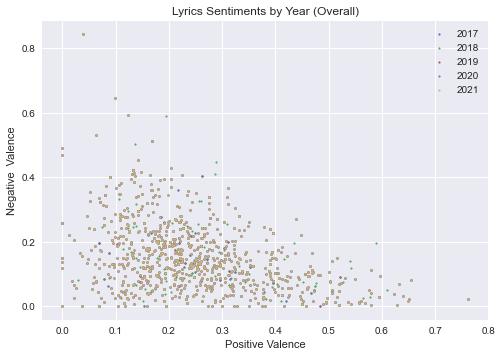

<Figure size 4320x4320 with 0 Axes>

In [45]:
for name, group in df.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name,s=3)
    plt.legend(fontsize=10)

plt.title("Lyrics Sentiments by Year (Overall)")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.figure(figsize=(60, 60))
plt.show()

In [46]:
means_df = df.groupby(['Year']).mean()
means_df

,streams,negative,neutral,positive,compound
Year,,,,,
2017,7.796346e+07,0.151875,0.603983,0.244155,0.339639
2018,6.534191e+07,0.151000,0.600641,0.248373,0.352757
2019,7.921310e+07,0.152491,0.602789,0.244733,0.343181
2020,7.891876e+07,0.151963,0.602515,0.245537,0.345960
2021,8.866856e+07,0.151391,0.603561,0.245059,0.344203


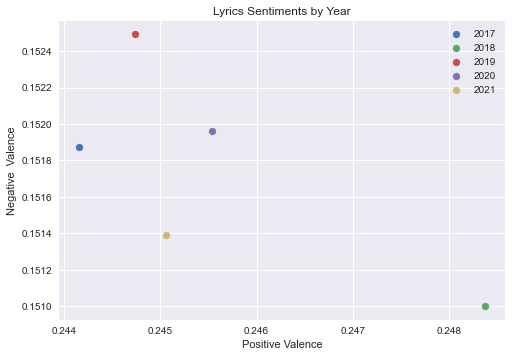

In [47]:
for name, group in means_df.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.title("Lyrics Sentiments by Year")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

# Before Covid

In [48]:
# bef covid 
df_befcovid=pd.concat([df2017,df2018,df2019])
df_befcovid

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,Shape of You,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017
1,Something Just Like This,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017
2,HUMBLE.,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017
3,"I'm the One (feat. Justin Bieber, Quavo, Chanc...","DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017
4,It Ain't Me (with Selena Gomez),"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017
...,...,...,...,...,...,...,...,...
870,Happy Now,"Zedd, Elley Duhé",4127591,4keoy2fqgwGnbWlm3ZVZFa,world away somewhere crowd foreign place happy...,world away somewher crowd foreign place happi ...,world away somewhere crowd foreign place happy...,2019
871,MAMA,"6ix9ine, Nicki Minaj, Kanye West",4121707,1oJ8EDr2pv94IvSd6ZmDgo,uh murda beat nice tiki taki spanish mami hot ...,uh murda beat nice tiki taki spanish mami hot ...,uh murda beat nice tiki taki spanish mami hot ...,2019
872,Ocean (feat. Khalid),"Martin Garrix, Khalid",4104898,3nc420PXjTdBV5TN0gCFkS,tell crying wipe tears oh love soul aching lov...,tell cri wipe tear oh love soul ach love comfo...,tell cry wipe tear oh love soul aching love co...,2019
873,10 Freaky Girls (with 21 Savage),"Metro Boomin, 21 Savage",4088895,0AluA5RNsa4Cx6XRhf2hWZ,ooh peace peace may rest may rest never ever s...,ooh peac peac may rest may rest never ever sho...,ooh peace peace may rest may rest never ever s...,2019


In [49]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df_befcovid.index:
    scores = sid.polarity_scores(df_befcovid['lemmatized_lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
    
#Create 4 columns to the main data frame  for each score
df_befcovid['negative'] = negative
df_befcovid['neutral'] = neutral
df_befcovid['positive'] = positive
df_befcovid['compound'] = compound
df_befcovid = df_befcovid.iloc[:,1:]
df_befcovid

,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,negative,neutral,positive,compound
0,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017,0.030,0.594,0.376,0.9994
1,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017,0.032,0.632,0.336,0.9959
2,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017,0.344,0.576,0.080,-0.9992
3,"DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017,0.069,0.721,0.210,0.9964
4,"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017,0.093,0.444,0.463,0.9974
...,...,...,...,...,...,...,...,...,...,...,...
870,"Zedd, Elley Duhé",4127591,4keoy2fqgwGnbWlm3ZVZFa,world away somewhere crowd foreign place happy...,world away somewher crowd foreign place happi ...,world away somewhere crowd foreign place happy...,2019,0.094,0.761,0.145,0.8910
871,"6ix9ine, Nicki Minaj, Kanye West",4121707,1oJ8EDr2pv94IvSd6ZmDgo,uh murda beat nice tiki taki spanish mami hot ...,uh murda beat nice tiki taki spanish mami hot ...,uh murda beat nice tiki taki spanish mami hot ...,2019,0.133,0.636,0.231,0.9742
872,"Martin Garrix, Khalid",4104898,3nc420PXjTdBV5TN0gCFkS,tell crying wipe tears oh love soul aching lov...,tell cri wipe tear oh love soul ach love comfo...,tell cry wipe tear oh love soul aching love co...,2019,0.071,0.645,0.284,0.9909
873,"Metro Boomin, 21 Savage",4088895,0AluA5RNsa4Cx6XRhf2hWZ,ooh peace peace may rest may rest never ever s...,ooh peac peac may rest may rest never ever sho...,ooh peace peace may rest may rest never ever s...,2019,0.164,0.539,0.298,0.9840


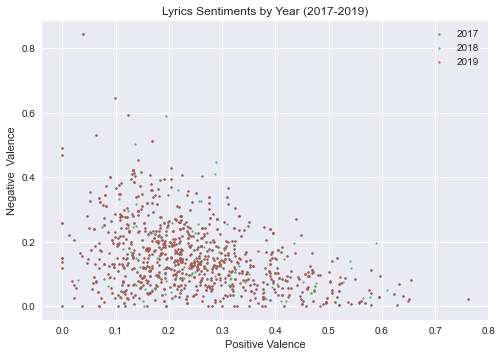

<Figure size 18000x18000 with 0 Axes>

In [50]:
for name, group in df_befcovid.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name, s=3)
    plt.legend(fontsize=10)

plt.title("Lyrics Sentiments by Year (2017-2019)")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.figure(figsize=(250, 250))
plt.show()

In [51]:
means_df_bef = df_befcovid.groupby(['Year']).mean()
means_df_bef

,streams,negative,neutral,positive,compound
Year,,,,,
2017,7.796346e+07,0.151875,0.603983,0.244155,0.339639
2018,6.534191e+07,0.151000,0.600641,0.248373,0.352757
2019,7.921310e+07,0.152491,0.602789,0.244733,0.343181


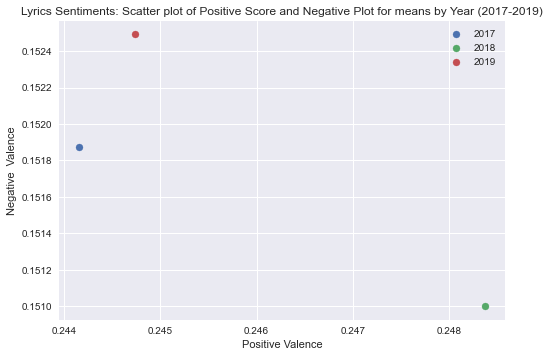

In [52]:
for name, group in means_df_bef.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.title("Lyrics Sentiments: Scatter plot of Positive Score and Negative Plot for means by Year (2017-2019)")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [53]:
# max value for multiple column
prediction = df_befcovid[['negative', 'neutral','positive']].idxmax(axis=1)

In [54]:
# Add predictions to dataframe
if 'Sentiment' in df_befcovid.columns:
    df_befcovid.drop(columns=['Sentiment'],inplace=True)
df_befcovid['Sentiment'] = prediction.tolist()

# predictions_df
df_befcovid

,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,negative,neutral,positive,compound,Sentiment
0,Ed Sheeran,1514648943,7qiZfU4dY1lWllzX7mPBI3,club best place find lover bar go friends tabl...,club best place find lover bar go friend tabl ...,club best place find lover bar go friend table...,2017,0.030,0.594,0.376,0.9994,neutral
1,"The Chainsmokers, Coldplay",704250265,6RUKPb4LETWmmr3iAEQktW,reading books old legends myths achilles gold ...,read book old legend myth achil gold hercul gi...,reading book old legend myth achilles gold her...,2017,0.032,0.632,0.336,0.9959,neutral
2,Kendrick Lamar,665416406,7KXjTSCq5nL1LoYtL7XAwS,nobody pray day way yeah yeah ayy remember syr...,nobodi pray day way yeah yeah ayi rememb syrup...,nobody pray day way yeah yeah ayy remember syr...,2017,0.344,0.576,0.080,-0.9992,neutral
3,"DJ Khaled, Justin Bieber, Quavo, Chance the Ra...",649357383,3DXncPQOG4VBw3QHh3S817,best music another one dj khaled yeah lookin t...,best music anoth one dj khale yeah lookin trut...,best music another one dj khaled yeah lookin t...,2017,0.069,0.721,0.210,0.9964,neutral
4,"Kygo, Selena Gomez",613063656,3eR23VReFzcdmS7TYCrhCe,dream sipping whiskey neat highest floor bower...,dream sip whiskey neat highest floor boweri hi...,dream sipping whiskey neat highest floor bower...,2017,0.093,0.444,0.463,0.9974,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
870,"Zedd, Elley Duhé",4127591,4keoy2fqgwGnbWlm3ZVZFa,world away somewhere crowd foreign place happy...,world away somewher crowd foreign place happi ...,world away somewhere crowd foreign place happy...,2019,0.094,0.761,0.145,0.8910,neutral
871,"6ix9ine, Nicki Minaj, Kanye West",4121707,1oJ8EDr2pv94IvSd6ZmDgo,uh murda beat nice tiki taki spanish mami hot ...,uh murda beat nice tiki taki spanish mami hot ...,uh murda beat nice tiki taki spanish mami hot ...,2019,0.133,0.636,0.231,0.9742,neutral
872,"Martin Garrix, Khalid",4104898,3nc420PXjTdBV5TN0gCFkS,tell crying wipe tears oh love soul aching lov...,tell cri wipe tear oh love soul ach love comfo...,tell cry wipe tear oh love soul aching love co...,2019,0.071,0.645,0.284,0.9909,neutral
873,"Metro Boomin, 21 Savage",4088895,0AluA5RNsa4Cx6XRhf2hWZ,ooh peace peace may rest may rest never ever s...,ooh peac peac may rest may rest never ever sho...,ooh peace peace may rest may rest never ever s...,2019,0.164,0.539,0.298,0.9840,neutral


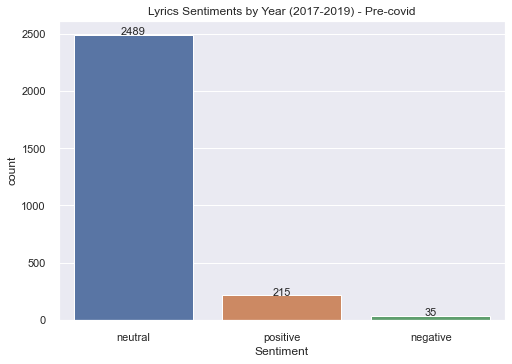

In [55]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=df_befcovid)
plt.title("Lyrics Sentiments by Year (2017-2019) - Pre-covid")

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

In [56]:
Positive = df_befcovid[df_befcovid["Sentiment"] == 'positive']
number_of_rows_positive = len(Positive)


Negative = df_befcovid[df_befcovid["Sentiment"] == 'negative']
number_of_rows_negative = len(Negative)

Neutral = df_befcovid[df_befcovid["Sentiment"] == 'neutral']
number_of_rows_neutral= len(Neutral)

print("Number of positive rows:", number_of_rows_positive)
print("Number of negative rows:", number_of_rows_negative)
print("Number of neutral rows:", number_of_rows_neutral)

Number of positive rows: 215
Number of negative rows: 35
Number of neutral rows: 2489


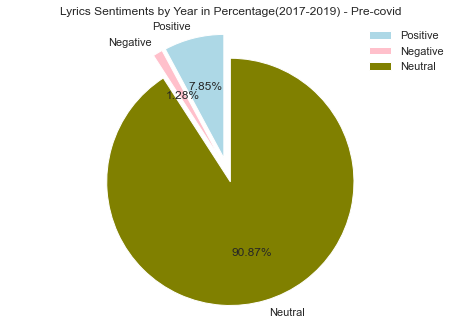

In [57]:
rows = [number_of_rows_positive, number_of_rows_negative,number_of_rows_neutral]

mylabels=["Positive","Negative","Neutral"]
colors=['#ADD8E6', '#FFC0CB', '#808000']
plt.pie(rows, labels = mylabels,colors=colors,startangle = 90,explode=[0.1, 0.1, 0.1],autopct='%1.2f%%')
plt.title("Lyrics Sentiments by Year in Percentage(2017-2019) - Pre-covid")
plt.legend()
plt.axis('equal')
plt.show() 

# Covid

In [58]:
# Covid 
df_covid=pd.concat([df2020,df2021])
df_covid

,track_name,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year
0,Blinding Lights,The Weeknd,1236759169,0VjIjW4GlUZAMYd2vXMi3b,yeah tryna call long enough maybe show love ma...,yeah tryna call long enough mayb show love may...,yeah tryna call long enough maybe show love ma...,2020
1,Dance Monkey,Tones And I,1194341955,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2020
2,The Box,Roddy Ricch,1045663988,0nbXyq5TXYPCO7pr3N8S4I,pullin coupe lot told em fuck fuck swat bustin...,pullin coup lot told em fuck fuck swat bustin ...,pullin coupe lot told em fuck fuck swat bustin...,2020
3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",917851312,7ytR5pFWmSjzHJIeQkgog4,woo woo pull like pull baby pull oh oh oh pull...,woo woo pull like pull babi pull oh oh oh pull...,woo woo pull like pull baby pull oh oh oh pull...,2020
4,Watermelon Sugar,Harry Styles,852045823,6UelLqGlWMcVH1E5c4H7lY,tastes like strawberries summer evenin sounds ...,tast like strawberri summer evenin sound like ...,taste like strawberry summer evenin sound like...,2020
...,...,...,...,...,...,...,...,...
827,Sunday Best,Surfaces,4858392,1Cv1YLb4q0RzL6pybtaMLo,good feeling good ayy feeling good like went t...,good feel good ayi feel good like went took wa...,good feeling good ayy feeling good like went t...,2021
828,Happier,"Marshmello, Bastille",4655272,2dpaYNEQHiRxtZbfNsse99,lately thinking want happier want happier morn...,late think want happier want happier morn come...,lately thinking want happier want happier morn...,2021
829,Tequila Shots,Kid Cudi,4540781,30KctD1WsHKTIYczXjip5a,duh duh duh duh duh duh falls back deeper stat...,duh duh duh duh duh duh fall back deeper state...,duh duh duh duh duh duh fall back deeper state...,2021
830,Lose Control,"MEDUZA, Becky Hill, Goodboys",4516053,7CHi4DtfK4heMlQaudCuHK,feel like drowning like running air ah ah ah f...,feel like drown like run air ah ah ah feel lik...,feel like drowning like running air ah ah ah f...,2021


In [59]:
#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df_covid.index:
    scores = sid.polarity_scores(df_covid['lemmatized_lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
    
#Create 4 columns to the main data frame  for each score
df_covid['negative'] = negative
df_covid['neutral'] = neutral
df_covid['positive'] = positive
df_covid['compound'] = compound
df_covid = df_covid.iloc[:,1:]
df_covid

,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,negative,neutral,positive,compound
0,The Weeknd,1236759169,0VjIjW4GlUZAMYd2vXMi3b,yeah tryna call long enough maybe show love ma...,yeah tryna call long enough mayb show love may...,yeah tryna call long enough maybe show love ma...,2020,0.050,0.779,0.170,0.9460
1,Tones And I,1194341955,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2020,0.054,0.845,0.101,0.8360
2,Roddy Ricch,1045663988,0nbXyq5TXYPCO7pr3N8S4I,pullin coupe lot told em fuck fuck swat bustin...,pullin coup lot told em fuck fuck swat bustin ...,pullin coupe lot told em fuck fuck swat bustin...,2020,0.179,0.696,0.125,-0.9753
3,"DaBaby, Roddy Ricch",917851312,7ytR5pFWmSjzHJIeQkgog4,woo woo pull like pull baby pull oh oh oh pull...,woo woo pull like pull babi pull oh oh oh pull...,woo woo pull like pull baby pull oh oh oh pull...,2020,0.121,0.566,0.313,0.9970
4,Harry Styles,852045823,6UelLqGlWMcVH1E5c4H7lY,tastes like strawberries summer evenin sounds ...,tast like strawberri summer evenin sound like ...,taste like strawberry summer evenin sound like...,2020,0.000,0.871,0.129,0.9493
...,...,...,...,...,...,...,...,...,...,...,...
827,Surfaces,4858392,1Cv1YLb4q0RzL6pybtaMLo,good feeling good ayy feeling good like went t...,good feel good ayi feel good like went took wa...,good feeling good ayy feeling good like went t...,2021,0.405,0.481,0.114,-0.9974
828,"Marshmello, Bastille",4655272,2dpaYNEQHiRxtZbfNsse99,lately thinking want happier want happier morn...,late think want happier want happier morn come...,lately thinking want happier want happier morn...,2021,0.219,0.550,0.231,-0.3000
829,Kid Cudi,4540781,30KctD1WsHKTIYczXjip5a,duh duh duh duh duh duh falls back deeper stat...,duh duh duh duh duh duh fall back deeper state...,duh duh duh duh duh duh fall back deeper state...,2021,0.214,0.692,0.094,-0.9953
830,"MEDUZA, Becky Hill, Goodboys",4516053,7CHi4DtfK4heMlQaudCuHK,feel like drowning like running air ah ah ah f...,feel like drown like run air ah ah ah feel lik...,feel like drowning like running air ah ah ah f...,2021,0.098,0.857,0.046,-0.8834


In [60]:
df_covid

,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,negative,neutral,positive,compound
0,The Weeknd,1236759169,0VjIjW4GlUZAMYd2vXMi3b,yeah tryna call long enough maybe show love ma...,yeah tryna call long enough mayb show love may...,yeah tryna call long enough maybe show love ma...,2020,0.050,0.779,0.170,0.9460
1,Tones And I,1194341955,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2020,0.054,0.845,0.101,0.8360
2,Roddy Ricch,1045663988,0nbXyq5TXYPCO7pr3N8S4I,pullin coupe lot told em fuck fuck swat bustin...,pullin coup lot told em fuck fuck swat bustin ...,pullin coupe lot told em fuck fuck swat bustin...,2020,0.179,0.696,0.125,-0.9753
3,"DaBaby, Roddy Ricch",917851312,7ytR5pFWmSjzHJIeQkgog4,woo woo pull like pull baby pull oh oh oh pull...,woo woo pull like pull babi pull oh oh oh pull...,woo woo pull like pull baby pull oh oh oh pull...,2020,0.121,0.566,0.313,0.9970
4,Harry Styles,852045823,6UelLqGlWMcVH1E5c4H7lY,tastes like strawberries summer evenin sounds ...,tast like strawberri summer evenin sound like ...,taste like strawberry summer evenin sound like...,2020,0.000,0.871,0.129,0.9493
...,...,...,...,...,...,...,...,...,...,...,...
827,Surfaces,4858392,1Cv1YLb4q0RzL6pybtaMLo,good feeling good ayy feeling good like went t...,good feel good ayi feel good like went took wa...,good feeling good ayy feeling good like went t...,2021,0.405,0.481,0.114,-0.9974
828,"Marshmello, Bastille",4655272,2dpaYNEQHiRxtZbfNsse99,lately thinking want happier want happier morn...,late think want happier want happier morn come...,lately thinking want happier want happier morn...,2021,0.219,0.550,0.231,-0.3000
829,Kid Cudi,4540781,30KctD1WsHKTIYczXjip5a,duh duh duh duh duh duh falls back deeper stat...,duh duh duh duh duh duh fall back deeper state...,duh duh duh duh duh duh fall back deeper state...,2021,0.214,0.692,0.094,-0.9953
830,"MEDUZA, Becky Hill, Goodboys",4516053,7CHi4DtfK4heMlQaudCuHK,feel like drowning like running air ah ah ah f...,feel like drown like run air ah ah ah feel lik...,feel like drowning like running air ah ah ah f...,2021,0.098,0.857,0.046,-0.8834


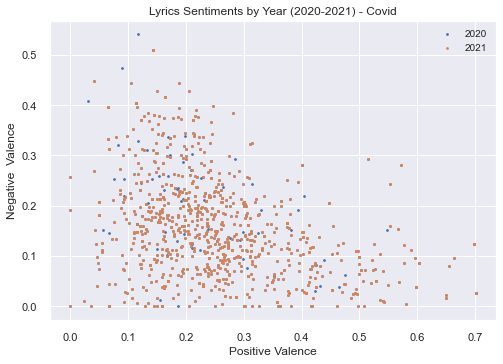

<Figure size 18000x18000 with 0 Axes>

In [61]:
for name, group in df_covid.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name, s=3)
    plt.legend(fontsize=10)

plt.title("Lyrics Sentiments by Year (2020-2021) - Covid")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.figure(figsize=(250, 250))
plt.show()

In [62]:
means_df_covid = df_covid.groupby(['Year']).mean()
means_df_covid

,streams,negative,neutral,positive,compound
Year,,,,,
2020,7.891876e+07,0.157877,0.591991,0.250132,0.295074
2021,8.866856e+07,0.154650,0.593719,0.251636,0.319242


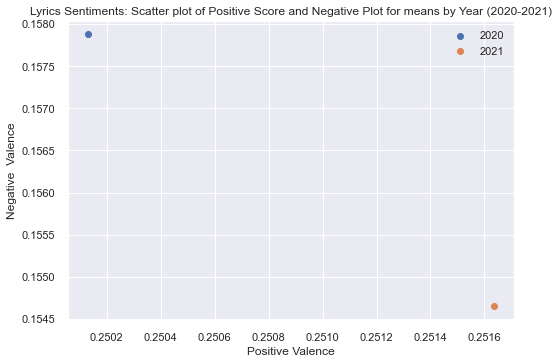

In [63]:
for name, group in means_df_covid.groupby('Year'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.title("Lyrics Sentiments: Scatter plot of Positive Score and Negative Plot for means by Year (2020-2021)")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [64]:
# max value for multiple column
predictions = df_covid[['negative', 'neutral','positive']].idxmax(axis=1)

In [65]:
# Add predictions to dataframe
if 'Sentiment' in df_covid.columns:
    df_covid.drop(columns=['Sentiment'],inplace=True)
df_covid['Sentiment'] = predictions.tolist()

# predictions_df
df_covid

,artist,streams,uid,cleaned_lyrics,stemmed_lyrics,lemmatized_lyrics,Year,negative,neutral,positive,compound,Sentiment
0,The Weeknd,1236759169,0VjIjW4GlUZAMYd2vXMi3b,yeah tryna call long enough maybe show love ma...,yeah tryna call long enough mayb show love may...,yeah tryna call long enough maybe show love ma...,2020,0.050,0.779,0.170,0.9460,neutral
1,Tones And I,1194341955,1rgnBhdG2JDFTbYkYRZAku,say oh god see way shine take hands dear place...,say oh god see way shine take hand dear place ...,say oh god see way shine take hand dear place ...,2020,0.054,0.845,0.101,0.8360,neutral
2,Roddy Ricch,1045663988,0nbXyq5TXYPCO7pr3N8S4I,pullin coupe lot told em fuck fuck swat bustin...,pullin coup lot told em fuck fuck swat bustin ...,pullin coupe lot told em fuck fuck swat bustin...,2020,0.179,0.696,0.125,-0.9753,neutral
3,"DaBaby, Roddy Ricch",917851312,7ytR5pFWmSjzHJIeQkgog4,woo woo pull like pull baby pull oh oh oh pull...,woo woo pull like pull babi pull oh oh oh pull...,woo woo pull like pull baby pull oh oh oh pull...,2020,0.121,0.566,0.313,0.9970,neutral
4,Harry Styles,852045823,6UelLqGlWMcVH1E5c4H7lY,tastes like strawberries summer evenin sounds ...,tast like strawberri summer evenin sound like ...,taste like strawberry summer evenin sound like...,2020,0.000,0.871,0.129,0.9493,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
827,Surfaces,4858392,1Cv1YLb4q0RzL6pybtaMLo,good feeling good ayy feeling good like went t...,good feel good ayi feel good like went took wa...,good feeling good ayy feeling good like went t...,2021,0.405,0.481,0.114,-0.9974,neutral
828,"Marshmello, Bastille",4655272,2dpaYNEQHiRxtZbfNsse99,lately thinking want happier want happier morn...,late think want happier want happier morn come...,lately thinking want happier want happier morn...,2021,0.219,0.550,0.231,-0.3000,neutral
829,Kid Cudi,4540781,30KctD1WsHKTIYczXjip5a,duh duh duh duh duh duh falls back deeper stat...,duh duh duh duh duh duh fall back deeper state...,duh duh duh duh duh duh fall back deeper state...,2021,0.214,0.692,0.094,-0.9953,neutral
830,"MEDUZA, Becky Hill, Goodboys",4516053,7CHi4DtfK4heMlQaudCuHK,feel like drowning like running air ah ah ah f...,feel like drown like run air ah ah ah feel lik...,feel like drowning like running air ah ah ah f...,2021,0.098,0.857,0.046,-0.8834,neutral


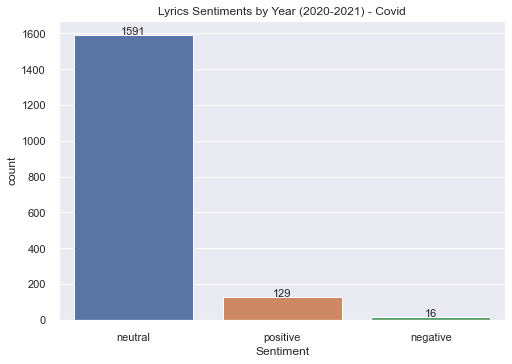

In [66]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=df_covid)
plt.title("Lyrics Sentiments by Year (2020-2021) - Covid")

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

In [67]:
Positive = df_covid[df_covid["Sentiment"] == 'positive']
number_of_rows_positive = len(Positive)


Negative = df_covid[df_covid["Sentiment"] == 'negative']
number_of_rows_negative = len(Negative)

Neutral = df_covid[df_covid["Sentiment"] == 'neutral']
number_of_rows_neutral= len(Neutral)

print("Number of positive rows:", number_of_rows_positive)
print("Number of negative rows:", number_of_rows_negative)
print("Number of neutral rows:", number_of_rows_neutral)

Number of positive rows: 129
Number of negative rows: 16
Number of neutral rows: 1591


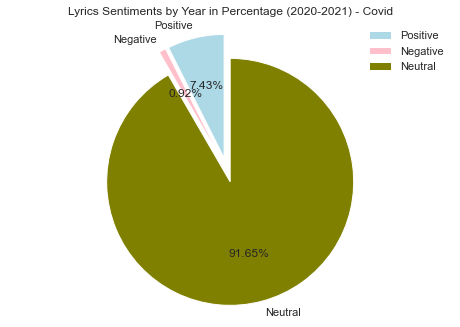

In [68]:
rows = [number_of_rows_positive, number_of_rows_negative,number_of_rows_neutral]

mylabels=["Positive","Negative","Neutral"]
colors=['#ADD8E6', '#FFC0CB', '#808000']
plt.pie(rows, labels = mylabels,colors=colors,startangle = 90,explode=[0.1, 0.1, 0.1],autopct='%1.2f%%')
plt.legend()
plt.title("Lyrics Sentiments by Year in Percentage (2020-2021) - Covid")
plt.axis('equal')
plt.show() 